<a href="https://colab.research.google.com/github/tanskaa/spotify-top-songs/blob/main/Spotify_songs_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Spotify Most Streamed Songs EDA & Prediction

**Main goal of a project** is to make an EDA of dataset and to find which regression model will represent better on this data.

**Technologies & library used:** pandas, numpy, seaborn, plotly, matplotlib for analysis and plotting; Random Forest, Gradient Boosting Machines (GBM), Support Vector Machines (SVM), Logistic Regression and TensorFlow Keras Neural Networks for models.

**Main info about dataset:**

Dataset is from [Kaggle](https://www.kaggle.com/datasets/amaanansari09/most-streamed-songs-all-time) and it shows 100 most streamed songs on Spotify with their Features Extracted using the Spotify API. 

Firstly it consists of 2 datasets 'features' and 'streams'. 

Dataset 'Features' has columns such as:
* *id* - Unique ID given to each song on spotify;
* *name* - name of the song;
* *duration* - duration of the song in minutes
* *energy* - measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* *key* - the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* *loudness* - the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* *mode* - indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* *speechiness* - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* *acousticness* - a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* *instrumentalness* - predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* *liveness* - represents the probability that a song was performed live. A value close to 1 indicates a high likelihood of the song being performed live, while a value close to 0 suggests a studio recording.
* *valence*	- represents the musical positiveness conveyed by a song. A higher valence value indicates a more positive and cheerful tone, while a lower value represents a more negative or sad tone.
* *tempo*	- represents the tempo or speed of a song measured in beats per minute (BPM). It indicates the overall pace and rhythm of the music.
* *danceability* - measures the suitability of a song for dancing based on factors like rhythm, beat strength, and tempo. A higher danceability value suggests a song that is more suitable for dancing, while a lower value indicates a song that may be less danceable.

Dataset 'Streams' has such columns:
* *song* - name of the song
* *artist* - name of the artist
* *streams(billions)* - streams of the song in billions 
* release date - date of the song release



####Importing libraries

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

####Importing dataset and merging it

In [ ]:
features = pd.read_csv('/kaggle/input/most-streamed-songs-all-time/Features.csv')
streams = pd.read_csv('/kaggle/input/most-streamed-songs-all-time/Streams.csv')

In [ ]:
features.head()

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825
2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824
3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501
4,0e7ipj03S05BNilyu5bRzt,Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585


In [ ]:
streams.head()

,Song,Artist,Streams (Billions),Release Date
0,Blinding Lights,The Weeknd,3.449,29-Nov-19
1,Shape of You,Ed Sheeran,3.398,06-Jan-17
2,Dance Monkey,Tones And I,2.770,10-May-19
3,Someone You Loved,Lewis Capaldi,2.680,08-Nov-18
4,Rockstar,Post Malone featuring 21 Savage,2.620,15-Sep-17


In [ ]:
df_main = pd.merge(left=streams, left_on = 'Song',
                   right = features, right_on = 'name')

In [ ]:
df_main.head(10)

,Song,Artist,Streams (Billions),Release Date,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,Blinding Lights,The Weeknd,3.449,29-Nov-19,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514
1,Shape of You,Ed Sheeran,3.398,06-Jan-17,7qiZfU4dY1lWllzX7mPBI3,Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825
2,Dance Monkey,Tones And I,2.770,10-May-19,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824
3,Someone You Loved,Lewis Capaldi,2.680,08-Nov-18,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501
4,Rockstar,Post Malone featuring 21 Savage,2.620,15-Sep-17,0e7ipj03S05BNilyu5bRzt,Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585
5,Sunflower,Post Malone and Swae Lee,2.575,18-Oct-18,3KkXRkHbMCARz0aVfEt68P,Sunflower,2.63,0.479,2,-5.574,1,0.0466,0.55600,0.000000,0.0703,0.913,89.911,0.760
6,One Dance,Drake featuring Wizkid and Kyla,2.556,05-Apr-16,1zi7xx7UVEFkmKfv06H8x0,One Dance,2.90,0.625,1,-5.609,1,0.0536,0.00776,0.001800,0.3290,0.370,103.967,0.792
7,Closer,The Chainsmokers featuring Halsey,2.481,29-Jul-16,7BKLCZ1jbUBVqRi2FVlTVw,Closer,4.08,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.1110,0.661,95.010,0.748
8,Stay,The Kid Laroi and Justin Bieber,2.432,09-Jul-21,789CxjEOtO76BVD1A9yJQH,Stay,4.01,0.310,9,-10.164,0,0.0283,0.94500,0.000061,0.1170,0.125,111.893,0.621
9,Believer,Imagine Dragons,2.410,01-Feb-17,0pqnGHJpmpxLKifKRmU6WP,Believer,3.41,0.780,10,-4.374,0,0.1280,0.06220,0.000000,0.0810,0.666,124.949,0.776


####Basic data analysis

Dropping column 'name' which is duplicate of the column 'song'

In [ ]:
df_main = df_main.drop(columns = ['name'])

Checking missing values

In [ ]:
print(f'Amount of missing values:\n{df_main.isna().sum()}')

Amount of missing values:
Song                  0
Artist                0
Streams (Billions)    0
Release Date          0
id                    0
duration              0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
danceability          0
dtype: int64


Checking duplicates

In [ ]:
print(f'Amount of duplicates: {df_main.duplicated().sum()}')

Amount of duplicates: 0


Main info about our final data

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Song                100 non-null    object 
 1   Artist              100 non-null    object 
 2   Streams (Billions)  100 non-null    float64
 3   Release Date        100 non-null    object 
 4   id                  100 non-null    object 
 5   duration            100 non-null    float64
 6   energy              100 non-null    float64
 7   key                 100 non-null    int64  
 8   loudness            100 non-null    float64
 9   mode                100 non-null    int64  
 10  speechiness         100 non-null    float64
 11  acousticness        100 non-null    float64
 12  instrumentalness    100 non-null    float64
 13  liveness            100 non-null    float64
 14  valence             100 non-null    float64
 15  tempo               100 non-null    float64
 16  danceabil

In [ ]:
df_main.describe()

,Streams (Billions),duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.896000,3.635300,0.625500,5.340000,-6.17631,0.650000,0.096448,0.260955,0.007848,0.165682,0.502032,121.253900,0.649630
std,0.371272,0.807997,0.160045,3.627114,2.00858,0.479372,0.088872,0.272764,0.048977,0.122867,0.224953,29.544364,0.144618
min,1.521000,1.520000,0.185000,0.000000,-12.20500,0.000000,0.028100,0.000025,0.000000,0.034400,0.061200,74.897000,0.340000
25%,1.647000,3.122500,0.523750,2.000000,-7.10375,0.000000,0.041200,0.026150,0.000000,0.094300,0.340750,98.022000,0.548000
50%,1.770500,3.505000,0.640000,6.000000,-5.97150,1.000000,0.059400,0.162500,0.000000,0.114000,0.492000,116.864000,0.671500
75%,2.046000,4.030000,0.741000,8.250000,-4.94075,1.000000,0.106000,0.431500,0.000086,0.217000,0.663000,142.439500,0.759250
max,3.449000,7.050000,0.912000,11.000000,-2.81000,1.000000,0.438000,0.945000,0.459000,0.790000,0.969000,186.003000,0.921000


Creating a column with counting days from release date

In [ ]:
df_main['Release Date'] = pd.to_datetime(df_main['Release Date'])


today = datetime.today().strftime('%Y-%m-%d')
df_main['Days Since Release'] = (pd.to_datetime(today) - df_main['Release Date']).dt.days

In [ ]:
df_main.head()

,Song,Artist,Streams (Billions),Release Date,id,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Days Since Release
0,Blinding Lights,The Weeknd,3.449,2019-11-29,0VjIjW4GlUZAMYd2vXMi3b,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514,1277
1,Shape of You,Ed Sheeran,3.398,2017-01-06,7qiZfU4dY1lWllzX7mPBI3,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825,2334
2,Dance Monkey,Tones And I,2.770,2019-05-10,2XU0oxnq2qxCpomAAuJY8K,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824,1480
3,Someone You Loved,Lewis Capaldi,2.680,2018-11-08,7qEHsqek33rTcFNT9PFqLf,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501,1663
4,Rockstar,Post Malone featuring 21 Savage,2.620,2017-09-15,0e7ipj03S05BNilyu5bRzt,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585,2082


####EDA

Scatterplot of release date and days since release

In [ ]:

fig = px.scatter(df_main, x="Days Since Release", y="Song", color = 'Days Since Release')
fig.show()

Correlation Matrix

In [ ]:
numerical_cols = ['duration', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability', 'key', 'mode']

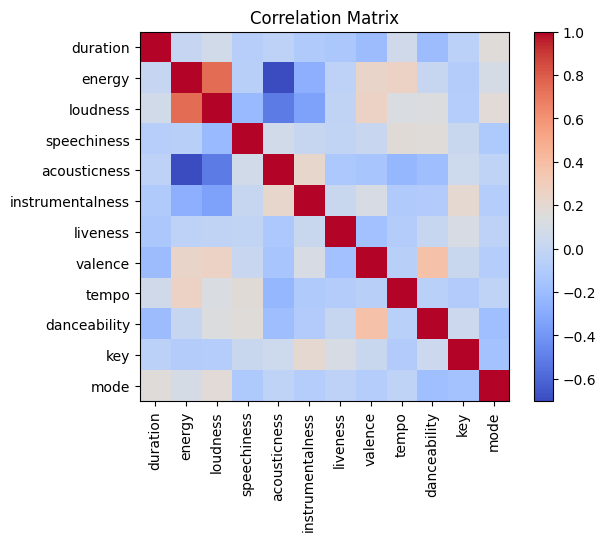

In [ ]:
corr_matrix = df_main[numerical_cols].corr()

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

Distribution of duration, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo and danceability by artist

In [ ]:
cols_to_compare = df_main[['duration', 'energy', 'loudness','speechiness', 
                           'acousticness', 'instrumentalness', 'liveness', 
                           'valence', 'tempo', 'danceability']]

In [ ]:
for feature in cols_to_compare:
    fig = px.violin(df_main, x='Artist', y=feature,  color = 'Artist', box=True, points='all')
    fig.update_layout(title=f"Distribution of {feature} by Artist",
                      xaxis_title="Artist",
                      yaxis_title=feature)
    fig.show()

Scatter plot of Danceability and Valence

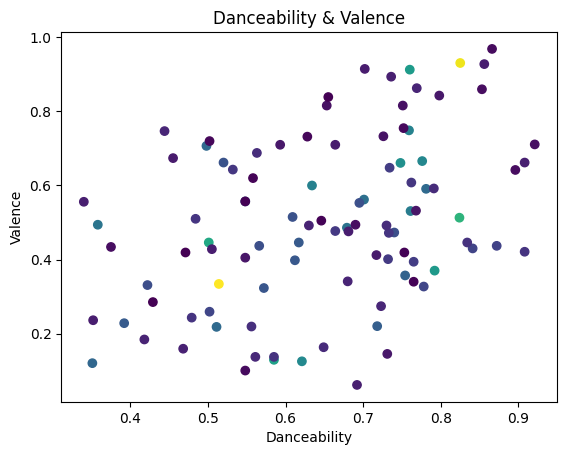

In [ ]:
colors = np.array(df_main['Streams (Billions)'])
plt.scatter(df_main['danceability'], df_main['valence'], c=colors, cmap='viridis')
plt.title("Danceability & Valence")
plt.xlabel("Danceability")
plt.ylabel("Valence")
plt.show()

Scatter plot of Loudness and Energy

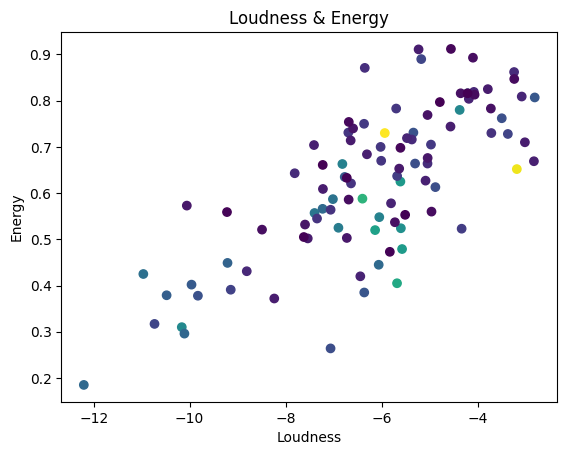

In [ ]:
colors = np.array(df_main['Streams (Billions)'])
plt.scatter(df_main['loudness'], df_main['energy'], c=colors, cmap='viridis')
plt.title("Loudness & Energy")
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.show()

Top 10 Most Streamed Artists

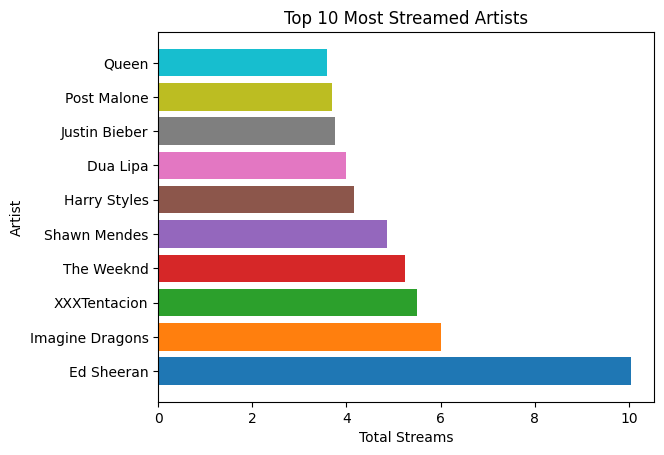

In [ ]:
# grouping by artist and summming streams and then sort 
df_grouped = df_main.groupby('Artist').agg({'Streams (Billions)': 'sum'})

df_sorted = df_grouped.sort_values('Streams (Billions)', ascending=False)


top_artists = df_sorted.head(10)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# creating bar plot
plt.barh(top_artists.index, top_artists['Streams (Billions)'], color = colors)
plt.title('Top 10 Most Streamed Artists')
plt.xlabel('Total Streams')
plt.ylabel('Artist')
plt.show()

####Building Regression Models

**Models which will be used:**
* Random Forest
* Gradient Boosting Machines (GBM)
* Support Vector Machines (SVM)
* Logistic Regression
* Neural Networks (NN)

Importing libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import math
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam

In [ ]:
df_main['Streams (Billions)'].value_counts()

1.579    2
1.647    2
1.666    2
1.673    2
1.680    2
        ..
1.984    1
1.987    1
1.990    1
2.003    1
1.521    1
Name: Streams (Billions), Length: 94, dtype: int64

Regression problem is to predict the streams of the song in billions using all the features in dataset without name of the artist, song and its release date. The target variable will be the column of streams of the song in billions.

In [ ]:
x = df_main.drop(["Artist", "Streams (Billions)", "Release Date", 'Days Since Release', 'id', 'Song'], axis=1)
y = df_main["Streams (Billions)"]

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

#####**Random Forest**

In [ ]:
rf_reg = RandomForestRegressor(random_state = 42)

rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.22449865589631082
Mean Absolute Error: 0.27569639999999995
Root mean squared error: 0.473812891230611
R-squared: -0.1438443496014874


Tuning Random Forest Regressor using Randomized Search

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, 
                                            stop = 2000, 
                                            num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_reg_tuned = RandomizedSearchCV(estimator = rf_reg, 
                                  param_distributions = random_grid,
                                  n_iter = 100,
                                  cv = 3,
                                  verbose = 2,
                                  random_state = 42,
                                  n_jobs = -1)

rf_reg_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_reg_tuned.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

Creating a function to evaluate models using metrics:
* Mean Squared error
* Mean Absolute Error
* Root Mean squared error
* R-squared

In [ ]:
def evaluate(model, test_features, test_labels):
  prediction = model.predict(test_features)
  mse = mean_squared_error(test_labels, prediction)
  mae = mean_absolute_error(test_labels, prediction)
  rmse = mean_squared_error(test_labels, prediction, squared=False)
  r2 = r2_score(test_labels, prediction)
  print("Mean Squared Error:", mse)
  print("Mean Absolute Error:", mae)
  print("Root mean squared error:", rmse)
  print("R-squared:", r2)
  return mse

In [ ]:
best_random = rf_reg_tuned.best_estimator_

In [ ]:
results_base = evaluate(rf_reg, X_test, y_test)

Mean Squared Error: 0.22449865589631082
Mean Absolute Error: 0.27569639999999995
Root mean squared error: 0.473812891230611
R-squared: -0.1438443496014874


In [ ]:
results_tuned = evaluate(best_random, X_test, y_test)

Mean Squared Error: 0.20920275288513707
Mean Absolute Error: 0.2683923474626101
Root mean squared error: 0.45738687441282905
R-squared: -0.06591010914231776


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (results_base - results_tuned) / results_base))

Improvement of 6.81%.


#####**GradientBoostingMachines**

In [ ]:
gbm_reg = GradientBoostingRegressor(random_state = 42)

gbm_reg.fit(X_train, y_train)

y_pred = gbm_reg.predict(X_test)

Tuning Gradient Boosting Regressor

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, 
                                            stop = 2000, 
                                            num = 10)]
max_features = ['auto', 'sqrt']
learning_rate = [0.01, 0.2]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

gbm_reg_tuned = RandomizedSearchCV(estimator = gbm_reg, 
                                  param_distributions = random_grid,
                                  n_iter = 100,
                                  cv = 3,
                                  verbose = 2,
                                  random_state = 42,
                                  n_jobs = -1)

gbm_reg_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.2],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
best_random = gbm_reg_tuned.best_estimator_

In [ ]:
results_base = evaluate(gbm_reg, X_test, y_test)

Mean Squared Error: 0.24236077327894073
Mean Absolute Error: 0.2911790189221154
Root mean squared error: 0.49230150647640797
R-squared: -0.23485372316974806


In [ ]:
results_tuned = evaluate(best_random, X_test, y_test)

Mean Squared Error: 0.21675758635354847
Mean Absolute Error: 0.274824847633254
Root mean squared error: 0.4655723212923514
R-squared: -0.10440278314306495


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (results_base - results_tuned) / results_base))

Improvement of 10.56%.


#####**Support Vector Machines (SVM)**

In [ ]:
svm_reg = SVR()

svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)

Tuning Support Vector Machine

In [ ]:

param_grid = {
    'C': np.logspace(-3, 3, 7),
    'epsilon': [0.1, 0.2, 0.5, 1.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
    }

svm_reg_tuned = RandomizedSearchCV(estimator=svm_reg, 
                                   param_distributions=param_grid,
                                   n_iter=100, 
                                   cv=3, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)


svm_reg_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'epsilon': [0.1, 0.2, 0.5, 1.0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, verbose=2)

In [ ]:
best_params = svm_reg_tuned.best_params_
print("Best Hyperparameters:", best_params)

y_pred = svm_reg_tuned.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best Hyperparameters: {'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.1, 'C': 1.0}
Mean Squared Error: 0.5926325028069789


In [ ]:
best_random = svm_reg_tuned.best_estimator_
print(best_random)

SVR(gamma='auto', kernel='linear')


In [ ]:
results_base = evaluate(svm_reg, X_test, y_test)

Mean Squared Error: 0.25346728762066706
Mean Absolute Error: 0.333638323301326
Root mean squared error: 0.503455348189556
R-squared: -0.2914425861312224


In [ ]:
results_tuned = evaluate(best_random, X_test, y_test)

Mean Squared Error: 0.5926325028069789
Mean Absolute Error: 0.4255316843773482
Root mean squared error: 0.7698262809277031
R-squared: -2.019525159380208


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (results_base - results_tuned) / results_base))

Improvement of -133.81%.


#####**Logistic Regression**

In [ ]:
lg_reg = LogisticRegression()

lg_reg.fit(X_train, y_train.astype('int'))

LogisticRegression()

Tuning Logistic Regression model


In [ ]:
param_grid = {
    'C': np.logspace(-4, 4, 20),  
    'penalty': ['l1', 'l2'],       
    'solver': ['liblinear']        
}

lg_reg_tuned = RandomizedSearchCV(estimator=lg_reg, 
                                   param_distributions=param_grid, 
                                   n_iter=100,  
                                   cv=5,        
                                   random_state=42,
                                   n_jobs=-1)

lg_reg_tuned.fit(X_train, y_train.astype('int'))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42)

In [ ]:
best_params = lg_reg_tuned.best_params_
best_random = lg_reg_tuned.best_estimator_
print(best_params)
print(best_random)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.23357214690901212}
LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')


In [ ]:
lg_reg_tuned = LogisticRegression(penalty = 'l1',
                                  C = 0.23357214690901212,
                                  solver = 'liblinear')

In [ ]:
lg_reg_tuned.fit(X_train, y_train.astype('int'))

results_tuned = evaluate(lg_reg_tuned, X_test, y_test)

Mean Squared Error: 1.07842985
Mean Absolute Error: 0.92425
Root mean squared error: 1.0384747709983138
R-squared: -4.49471392351597


In [ ]:
results_base = evaluate(lg_reg, X_test, y_test)

Mean Squared Error: 1.07842985
Mean Absolute Error: 0.92425
Root mean squared error: 1.0384747709983138
R-squared: -4.49471392351597


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (results_base - results_tuned) / results_base))

Improvement of 0.00%.


#####Neural Network

Creating base network

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

y_pred = model.predict(X_test)

Epoch 1/50
3/3 [==============================] - 1s 10ms/step - loss: 1.9905
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 1.4734
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 1.0664
Epoch 4/50
3/3 [==============================] - 0s 5ms/step - loss: 0.7608
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.5333
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3920
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.3287
Epoch 8/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3104
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 0.2963
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.2874
Epoch 11/50
3/3 [==============================] - 0s 4ms/step - loss: 0.2683
Epoch 12/50
3/3 [==============================] - 0s 4ms/step - loss: 0.2379
Epoch 13/50
3/3 [==============================] - 0s 4ms/step - loss: 0

Tuning Neural Network

In [ ]:
model_tuned = Sequential()
model_tuned.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
model_tuned.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model_tuned.add(Dense(64, activation='relu'))  # Hidden layer
model_tuned.add(Dropout(0.2))  
model_tuned.add(Dense(1, activation='linear'))  

model_tuned.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

history = model_tuned.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

mse_tuned = model_tuned.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

Epoch 1/100
3/3 [==============================] - 1s 78ms/step - loss: 4.1190 - val_loss: 3.8789
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 3.0226 - val_loss: 2.9725
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 2.3242 - val_loss: 2.2580
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 1.4623 - val_loss: 1.6992
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 1.0929 - val_loss: 1.2858
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7477 - val_loss: 1.0147
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.4720 - val_loss: 0.8665
Epoch 8/100
3/3 [==============================] - 0s 16ms/step - loss: 0.4854 - val_loss: 0.8102
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 0.4859 - val_loss: 0.8022
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: 0.5578 - val_loss: 0.7970
Epoch 11/100
3/3 [=

In [ ]:
print(mse)

0.4872806966304779


In [ ]:
print(mse_tuned)

0.6022558212280273


In [ ]:
print('Improvement of {:0.2f}%.'.format(100 * (mse - mse_tuned) / mse))

Improvement of -23.60%.


####What model is the best?

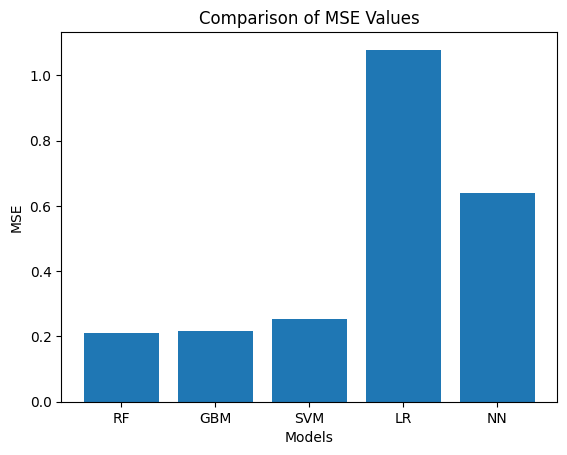

In [ ]:
mse_values = [0.20920275288513707, 0.21675758635354847, 0.25346728762066706, 1.07842985, 0.6379622220993042]  


model_names = ['RF', 'GBM', 'SVM', 'LR', 'NN']  


plt.bar(model_names, mse_values)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE Values')
plt.show()

####Conclusion

As we can see, the best model to use with a regression problem (predicting Streams in billions of top songs) on this dataset is **Random Forest** with the lowest MSE, the worst is **Logistic Regression**.

😀


